In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import features                      # your helper module

plt.style.use("ggplot")              # nicer default look

# --- Load data --------------------------------------------------
DATA  = Path.cwd().parent            # one level up from /notebooks
train = pd.read_csv(DATA / "train.csv")

# --- Feature engineering ---------------------------------------
train = features.add_time_features(train)   # adds hour/weekday/month
train['datetime'] = pd.to_datetime(train['datetime'])  # ensure datetime dtype

train.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


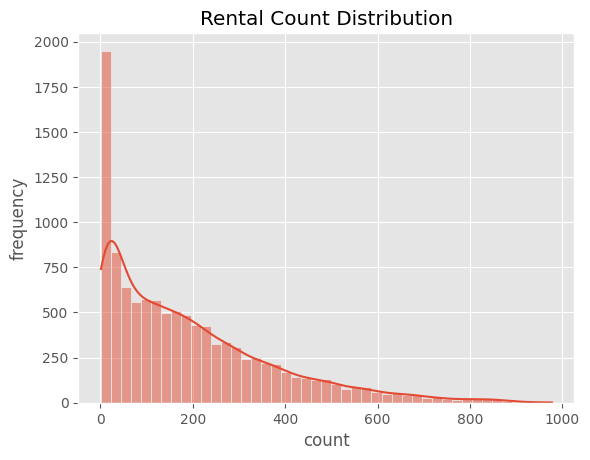

In [2]:
sns.histplot(train['count'], kde=True)
plt.title("Rental Count Distribution")
plt.xlabel("count"); plt.ylabel("frequency")
plt.show()


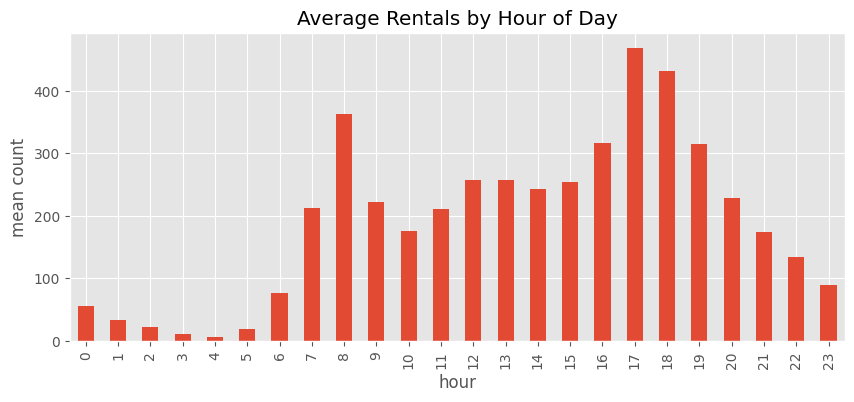

In [3]:
plt.figure(figsize=(10,4))
(train.groupby('hour')['count']
      .mean()
      .plot(kind='bar'))
plt.title("Average Rentals by Hour of Day")
plt.ylabel("mean count"); plt.xlabel("hour")
plt.show()


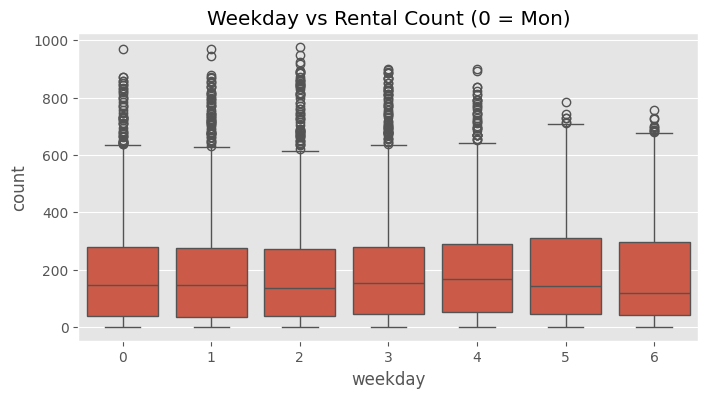

In [4]:
plt.figure(figsize=(8,4))
sns.boxplot(x='weekday', y='count', data=train)
plt.title("Weekday vs Rental Count (0 = Mon)")
plt.show()


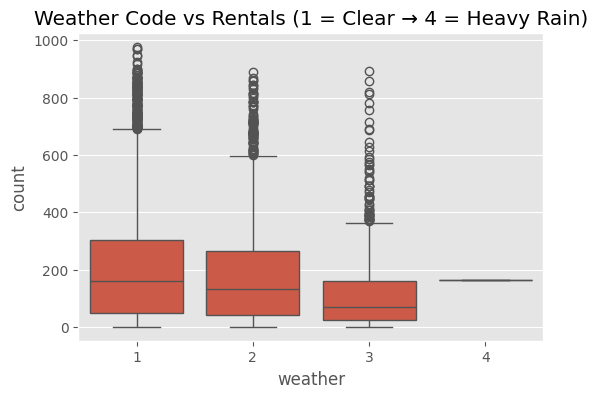

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='weather', y='count', data=train)
plt.title("Weather Code vs Rentals (1 = Clear → 4 = Heavy Rain)")
plt.show()


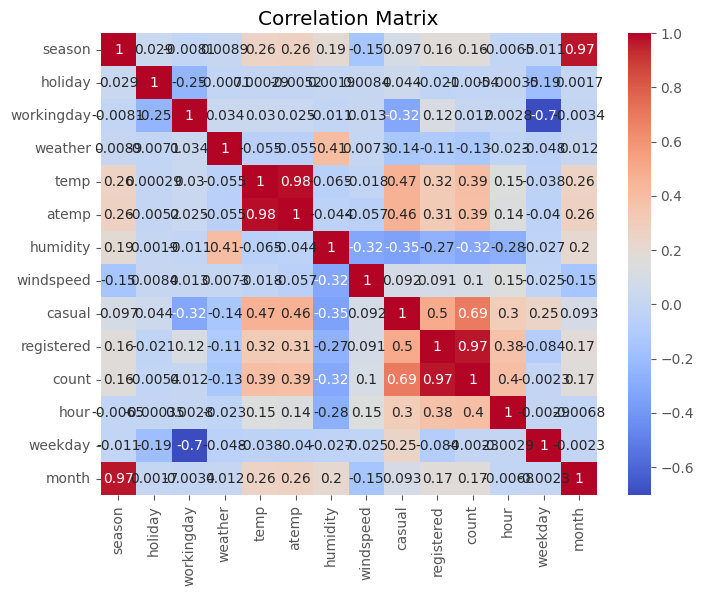

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(numeric_only=True),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [7]:
git add notebooks/01_eda.ipynb
git commit -m "EDA: distribution, hourly, weekday, weather plots"
git push


SyntaxError: invalid decimal literal (3559139145.py, line 1)